In [643]:
import numpy as np
import matplotlib.pyplot as plt

In [644]:
from scipy.spatial import distance_matrix
from sklearn.linear_model import LinearRegression

In [645]:
import random

In [751]:
def regression_based_outlier_detection(ts_data, neighbor, station, n_regressors = 3, n_variables = 3, eps=1) :
    result = np.array([], dtype='int')
    for i in range(n_regressors) : 
        idx = random.choices(neighbor[station],k=n_variables)
        y = ts_data[station] 
        X = ts_data[idx]
        reg = LinearRegression().fit(X.T, y)
#         print(reg.score(X.T, y))
        original = ts_data[station]
        predict = reg.intercept_ + np.dot(X.T, reg.coef_)
#         print(abs(predict - original))
        ix = np.where(abs(predict - original) > eps)
#         print(ix)
        result = np.append(result, ix)
#         print(result)

    unique, counts = np.unique(result, return_counts=True)
    RESULT = dict(zip(unique, counts))
#     print(RESULT)
    return {k: v for k, v in sorted(RESULT.items(), key=lambda item: item[1])}

    
    

# CREATING SIMULATION DATA

In [773]:
x_length = 200
y_length = 200

n_stations = 10000
time_length = 100

k = 10


In [774]:
#random metadata creation 
metadata = np.zeros((n_stations,2), dtype='int')
for i in range(n_stations) : 
    x = random.choice(range(x_length))
    y = random.choice(range(y_length))
    metadata[i] = [x,y]



In [775]:
#neighbor list
dist_matrix = distance_matrix(metadata,metadata)
neighbor = dist_matrix.argsort()[:, 1:k+1]

In [799]:
#random data creation 
ts_data = np.zeros((n_stations, time_length))
lst_failed_station = {}
s = random.choice(range(20,30,1))
for time_step in range(time_length) :        
    temperature = random.choice(range(s-3,s+3,1))
    val = temperature + np.random.rand(n_stations)    
    #add random noise with 10% prop
    if random.random() < 0.1 : 
        failed_station = random.choice(range(n_stations))
        noise = random.random() * 20
        sign = random.choice([-1,1])
        
        val[failed_station] = val[failed_station] + noise * sign 
        print(failed_station, time_step, "\t", sign, "\t", noise)
        
        lst_failed_station[failed_station] =[time_step, sign * noise]
        
    
    ts_data[:,time_step] = val
# print(len(lst_failed_station))
    

4282 11 	 1 	 10.639689659390477
6566 13 	 1 	 8.75825554045768
1616 24 	 -1 	 8.351945840433912
2292 63 	 -1 	 15.131270088918136
5982 65 	 1 	 9.783923294829824
1787 79 	 -1 	 16.44876542242278
7351 98 	 1 	 3.921119345890687


plt.figure(figsize=(20,20))
plt.imshow(ts_data)

In [802]:
for station in lst_failed_station.keys() : 
    i = station
    result = regression_based_outlier_detection(ts_data, neighbor, station=i, n_regressors = 10, n_variables = 3, eps=2)
    print(station, ": ", result.get(lst_failed_station[station][0],-1))
    print(result)
#     plt.plot(ts_data[neighbor[station]].T, color='gray')
#     plt.plot(ts_data[station], color='red')

4282 :  10
{11: 10}
6566 :  10
{13: 10}
1616 :  10
{24: 10}
2292 :  10
{63: 10}
5982 :  7
{65: 7}
1787 :  10
{79: 10}
7351 :  10
{98: 10}


In [672]:
for i in range(n_stations) : 
#     plt.figure()    
    RESULT = regression_based_outlier_detection(ts_data, neighbor, station, n_regressors = 5, n_variables = 2, eps=1)
    if len(RESULT) > 0 : 
        print(i, RESULT)
#     plt.plot(ts_data[neighbor[i]].T, color='gray')
#     plt.plot(ts_data[i].T, color='red')
# print("\n")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [230]:
dist_matrix = distance_matrix(metadata,metadata)

0.9974505250456086
87 13.864367583086752


21 12.588935613643686


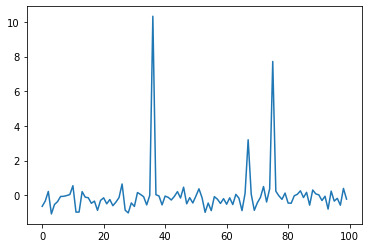

In [183]:
plt.plot(predict - original)

array([0.17866241, 0.05695667, 0.28054333, 0.19033037, 0.30030318])